In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
data= pd.read_csv('Classified Data', index_col=0)
data.head()
data.describe()
DATA= data['TARGET CLASS']

In [49]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data.drop('TARGET CLASS', axis=1, inplace=True)

In [50]:
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
scaled_features= scaler.transform(data)

In [52]:
data_feat= pd.DataFrame(scaled_features, columns= data.columns)

In [53]:
data.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [54]:
data_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [55]:
from sklearn.cross_validation import train_test_split

In [57]:
X= data_feat
y= DATA

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.30, random_state=101)

# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn= KNeighborsClassifier(n_neighbors=1)

In [61]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [62]:
pred= knn.predict(X_test)

In [63]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
print(confusion_matrix(y_test, pred))

[[151   8]
 [ 15 126]]


In [67]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



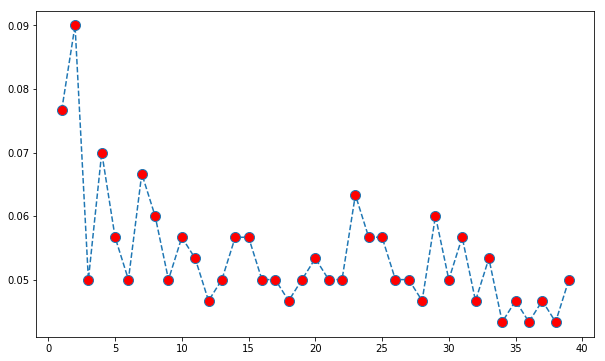

In [80]:
error_rate= []
for i in range(1,40):
    
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,linestyle='dashed', marker='o', markerfacecolor= 'red', markersize=10)
##x me error_rate
##y me K
##error_Rate decrease ho rhi h 

In [70]:
error_rate

[0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666]